In [1]:
#importing Libarires

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import Dataset

data=pd.read_excel("iris.xls")


In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.describe()


,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#Handling Missing values

In [9]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [10]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
num_cols = data[['SL', 'SW', 'PL',
       'PW']]

In [12]:
num_cols.isna().sum()

SL    7
SW    6
PL    6
PW    0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [15]:
type(num_cols)

numpy.ndarray

In [16]:
num_cols = pd.DataFrame(num_cols, columns=[['SL', 'SW', 'PL',
       'PW']])

In [17]:
num_cols.isna().sum()

SL    0
SW    0
PL    0
PW    0
dtype: int64

In [18]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [19]:
data.drop(['SL', 'SW', 'PL',
       'PW'], axis=1,inplace=True)

In [20]:
data.head()

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [21]:
data=pd.concat([num_cols,data],axis=1)

In [22]:
data.head()

,"(SL,)","(SW,)","(PL,)","(PW,)",Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [23]:
data.isna().sum()

(SL,)             0
(SW,)             0
(PL,)             0
(PW,)             0
Classification    0
dtype: int64

# Correlation

<AxesSubplot:>

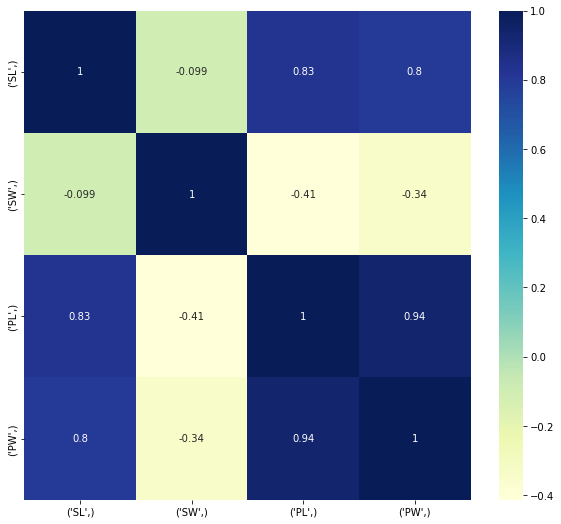

In [24]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,9))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

# LabelEncoding



In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head()



,"(SL,)","(SW,)","(PL,)","(PW,)",Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [26]:
data.tail()

,"(SL,)","(SW,)","(PL,)","(PW,)",Classification
145,6.7,3.0,5.20000,2.3,2
146,6.3,2.5,5.00000,1.9,2
147,6.5,3.0,3.75625,2.0,2
148,6.2,3.4,5.40000,2.3,2
149,5.9,3.0,5.10000,1.8,2


# Model Training

In [27]:
# splitting the data

y=data['Classification']
x=data.drop('Classification',axis=1)

In [28]:
print(x.shape)

(150, 4)


In [29]:
print(y.shape)

(150,)


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logit_model=LogisticRegression()
logit_model=logit_model.fit(x_train,y_train)
y_predict_logit=logit_model.predict(x_test)

C:\Users\jaimo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jaimo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test,y_predict_logit)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_predict_logit)

1.0

# KNN Model

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier = classifier.fit(x_train,y_train)
y_pred_kNN = classifier.predict(x_test)

C:\Users\jaimo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jaimo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [40]:
confusion_matrix(y_test,y_pred_kNN)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [41]:
accuracy_score(y_test,y_pred_kNN)

0.9666666666666667

# SVM

In [42]:
from sklearn.svm import SVC

In [43]:
svm_clf = SVC(kernel='linear')
svm_clf = svm_clf.fit(x_train,y_train)
y_pred_svm = svm_clf.predict(x_test)

C:\Users\jaimo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jaimo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred_svm)

1.0

In [47]:
svm_clf2 =SVC(kernel='rbf')
svm_clf2=svm_clf2.fit(x_train,y_train)
y_pred_svm2=svm_clf2.predict(x_test)

C:\Users\jaimo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jaimo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [48]:
confusion_matrix(y_test,y_pred_svm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [49]:
accuracy_score(y_test,y_pred_svm2)

1.0

# Decision tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)

C:\Users\jaimo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jaimo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [52]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [53]:
accuracy_score(y_test,y_pred_dt)

1.0

# Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)

C:\Users\jaimo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jaimo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [56]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [57]:
accuracy_score(y_test,y_pred_rf)

1.0

In [58]:
#For Logistic,SVM,Decision tree and for random forest accuracy is 100%.  
#compared to these above models Knn having less accuracy 96%